In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
dataset=pd.read_csv(r"C:\Users\dell\Desktop\Current\Machine Learning\Python Programs\PYTHON_DATA\Cust_Spend_Data.csv")

In [3]:
dataset.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [5]:
data = dataset.iloc[:, 2:6].values  
#standardize the data to normal distribution
from sklearn import preprocessing
dataset_standardized = preprocessing.scale(data)
dataset_standardized = pd.DataFrame(dataset_standardized)

In [6]:
dataset_standardized.head()

,0,1,2,3
0,1.886498,-1.240347,1.527525,-0.741433
1,0.787567,-0.620174,-0.654654,1.280656
2,0.787567,1.860521,1.527525,-0.292080
3,0.604412,0.620174,1.527525,-0.741433
4,0.421257,1.240347,-0.654654,1.730009


# WSS Plot or Elbow Curve for Optimal cluster identification

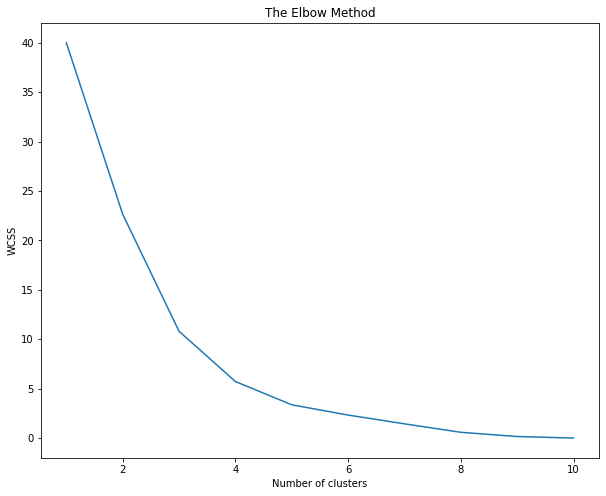

In [7]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,4.7,5166.7,4.7,0.0,11.0,4.7
2,8.2,2375.0,3.0,0.0,1.2,4.5
3,2.7,7833.3,4.7,1.0,1.7,2.7
